17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/3
157/157 [==============================] - 71s 412ms/step - loss: 0.6498 - accuracy: 0.6003 - val_loss: 0.6084 - val_accuracy: 0.6982
Epoch 2/3
157/157 [==============================] - 52s 334ms/step - loss: 0.3608 - accuracy: 0.8464 - val_loss: 0.4118 - val_accuracy: 0.8156
Epoch 3/3
196/196 [==============================] - 4s 19ms/step - loss: 0.4012 - accuracy: 0.8357
Epoch 1/3
157/157 [==============================] - 30s 166ms/step - loss: 0.4783 - accuracy: 0.7509 - val_loss: 0.3378 - val_accuracy: 0.8558
Epoch 2/3
157/157 [==============================] - 17s 111ms/step - loss: 0.2448 - accuracy: 0.9028 - val_loss: 0.3038 - val_accuracy: 0.8724
Epoch 3/3
196/196 [==============================] - 1s 6ms/step - loss: 0.3569 - accuracy: 0.8619
Epoch 1/3
157/157 [==============================] - 27s 162ms/step - loss: 0.4534 - accuracy: 0.7718 - val_loss: 0.3031 - val_accuracy: 0.8726
Epoch 2/3
157/15

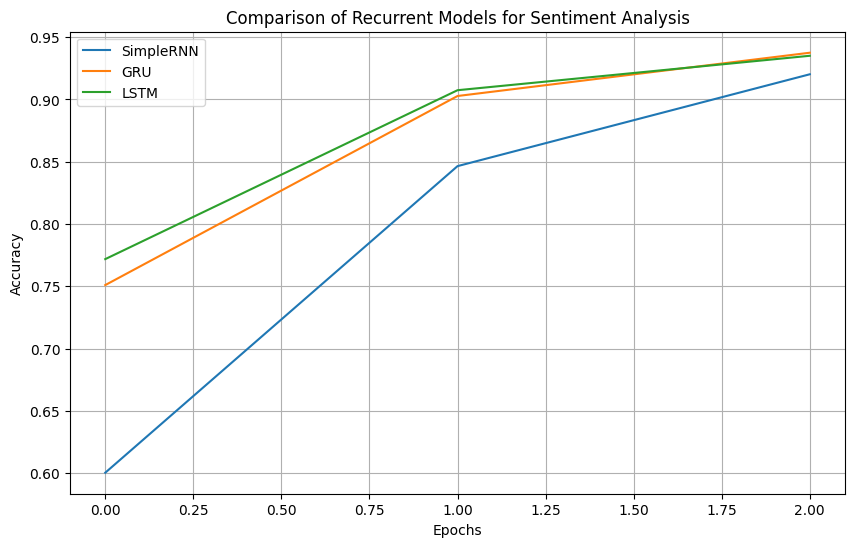

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 250
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

accuracies = []

model_names = ["SimpleRNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        SimpleRNN(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        GRU(64),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 64, input_length=max_length),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
]

batch_size = 128
epochs = 3

histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(round(accuracy,1))

plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()
